In [1]:
import networkx as nx
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import random

In [2]:
fh=open("Wiki-Vote.txt", 'rb')
wiki=nx.read_adjlist(fh)

In [3]:

def average_path_length_sample(G, N_sample):
    if ( G.is_directed() ):
        subgraph=G.subgraph(list(max(nx.strongly_connected_components(G), key=len)))  
    else:
        subgraph=G.subgraph(list(max(nx.connected_components(G), key=len)))
        
    ave= nx.average_shortest_path_length(subgraph)
    return ave

In [4]:
def ecce(G, N_sample):
    if ( G.is_directed() ):
        subgraph=G.subgraph(list(max(nx.strongly_connected_components(G), key=len)))    
    else:
        subgraph=G.subgraph(list(max(nx.connected_components(G), key=len)))
        
    eccentricity = nx.eccentricity(subgraph)
    return eccentricity

In [5]:
def diam(G, N_sample):
    if ( G.is_directed() ):
        subgraph=G.subgraph(list(max(nx.strongly_connected_components(G), key=len)))     
    else:
        subgraph=G.subgraph(list(max(nx.connected_components(G), key=len)))
        
    dist = nx.diameter(subgraph)
    return dist

In [6]:
def cen(G, N_sample):
    if ( G.is_directed() ):
        subgraph=G.subgraph(list(max(nx.strongly_connected_components(G), key=len)))     
    else:
        subgraph=G.subgraph(list(max(nx.connected_components(G), key=len)))
        
    center = nx.center(subgraph)
    return center

In [7]:
network = [wiki]
to_df_1 = []
for i in network:
    num_nodes = nx.number_of_nodes(i)
    num_links = nx.number_of_edges(i)
    #density = nx.density(i)
    clust_coef = nx.average_clustering(i)
    #readius = nx.radius(i)
    N_sample = 1000
    subgraph = wiki.subgraph(list(max(nx.connected_components(wiki), key=len)))
    Nodes_sample = random.sample(subgraph.nodes, N_sample+200)
    Graph_sample = wiki.subgraph(Nodes_sample)
    avg_sht_path = average_path_length_sample(Graph_sample, 1000)
    #eccentricity = ecce(Graph_sample, 1000)
    diameter = diam(Graph_sample, 1000)
    center = cen(Graph_sample, 1000)
    elementos_cen = len(center)
    #mean_deg = statistics.mean(degree_cent)
    lis_of_them = [num_nodes, num_links, clust_coef, avg_sht_path, 
                   diameter, center, elementos_cen]
    to_df_1.append(lis_of_them)
net_features = pd.DataFrame(data=to_df_1, columns=['num_nodes', 'num_links', 
                                                   'clust_coef', 'avg_shortest_path', 
                                                   'diameter', 'nodes_center', 
                                                   'num_elements_center'])
net_features

print(to_df_1)

[[7115, 100762, 0.14089784589308738, 3.5049006717506157, 8, ['1211', '319', '1496', '24'], 4]]


In [8]:
net_features = pd.DataFrame(data=to_df_1, columns=['num_nodes', 'num_links', 'clust_coef', 'avg_shortest_path', 'diameter', 'nodes_center', 'num_elements_center'])
net_features

,num_nodes,num_links,clust_coef,avg_shortest_path,diameter,nodes_center,num_elements_center
0,7115,100762,0.140898,3.504901,8,"[1211, 319, 1496, 24]",4


In [9]:
network = [wiki]
to_df_2 = []
for i in network:
    degree_cent = nx.degree_centrality(i)
    max_deg = max(degree_cent)
    min_deg = min(degree_cent)
    pagerank = nx.pagerank(i)
    betweenness = nx.betweenness_centrality(i)
    max_betweenness = max(betweenness)
    min_betweenness = min(betweenness)
    closeness = nx.closeness_centrality(i)
    max_closeness = max(closeness)
    min_closeness = min(closeness)
    lis_of_them1 = [min_deg, max_deg, pagerank, 
                    min_betweenness, 
                    max_betweenness, min_closeness,
                    max_closeness]
    to_df_2.append(lis_of_them1)

cent_measures = pd.DataFrame(data=to_df_2, 
                             columns=['min_deg', 
                                      'max_deg', 
                                      'pagerank', 
                                      'min_betweenness', 
                                      'max_betweenness', 'min_closeness', 
                                      'max_closeness'])
cent_measures

,min_deg,max_deg,pagerank,min_betweenness,max_betweenness,min_closeness,max_closeness
0,10,999,"{'30': 0.0001519420295970706, '1412': 0.000270...",10,999,10,999


In [20]:
page = cent_measures["pagerank"]


KeyError: ignored

In [ ]:
def edge_to_remove(G):
	dict1 = nx.edge_betweenness_centrality(G)
	lit_of_tuples = dict1.items()
	list_of_tuples.sort( key = lambda x:x[1], reverse = True)
	return list_of_tuples[0][0]
	

def girvan(G):
	c = (G.subgraph(c).copy() for c in nx.connected_components(G))
	#l = len(c)
	#print('The number of connected_components are {}'.format(l))

	#while(l == 1):
		#G.remove_edge(*edge_to_remove(G))
		#c = (G.subgraph(c).copy() for c in nx.connected_components(G))
		#l = len(c)
		#print('The number of connected_components are {}'.format(l))

	return c

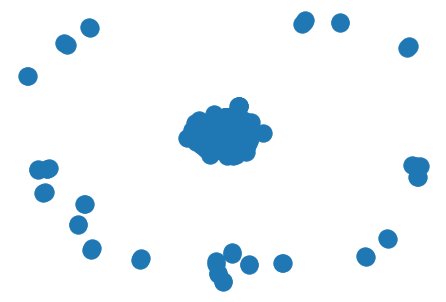

In [11]:
nx.draw(wiki)
plt.show()

In [21]:
betweenness = nx.centrality.betweenness_centrality(wiki)
sor1 = sorted(betweenness.items(), key=lambda x: x[1],reverse=True)[0:1]
print('The node who has the highest closeness centrality is {}'.format(max(sor1)))

The node who has the highest closeness centrality is ('2565', 0.06125752063855017)


In [23]:
clos_cen = nx.closeness_centrality(wiki)

sor = sorted(clos_cen.items(), key=lambda x: x[1],reverse=True)[0:1]
print('The airpot who has the highest closeness centrality is {}'.format(max(sor)))

The airpot who has the highest closeness centrality is ('2565', 0.48741490125142045)


In [24]:
degree_sequence3 = sorted([d for d in nx.degree(wiki)], reverse=True)[0:5]
print('The top five nodes are the following \n{}'.format(degree_sequence3))

The top five nodes are the following 
[('999', 39), ('998', 30), ('996', 297), ('995', 18), ('994', 72)]
